In [44]:
# Proposal for Apollon 2025 about X-ray and neutron dual source
# Figure of spectra for protons, electrons, and X-rays

# load plotting parameters
import matplotlib as mpl
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=16)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_13786/3680152249.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [4]:
# load experiment data for proton

import numpy as np
data_energy = np.loadtxt('/Users/yao/Desktop/Proton_Spectrum_RCF_MeV_Avg.dat',usecols=0)
data_dnde   = np.loadtxt('/Users/yao/Desktop/Proton_Spectrum_RCF_MeV_Avg.dat',usecols=1)
data_error  = np.loadtxt('/Users/yao/Desktop/Proton_Spectrum_RCF_MeV_Avg.dat',usecols=2)

In [59]:
# get simulation data for proton

import happi

wkdir = [
        '/Users/yao/Desktop/Data/x4/',
        '/Users/yao/Documents/Data/LIOR_F1_test3/'
        ]
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.*np.pi*3e8/0.8e-6)
S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.*np.pi*3e8/0.8e-6)

simu_energy0 = np.array(S0.Screen(0, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
simu_dnde0   = np.array(S0.Screen(0, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments

simu_energy1 = np.array(S1.Screen(0, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
simu_dnde1   = np.array(S1.Screen(0, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments



Loaded simulation '/Users/yao/Desktop/Data/x4/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
Loaded simulation '/Users/yao/Documents/Data/LIOR_F1_test3/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics


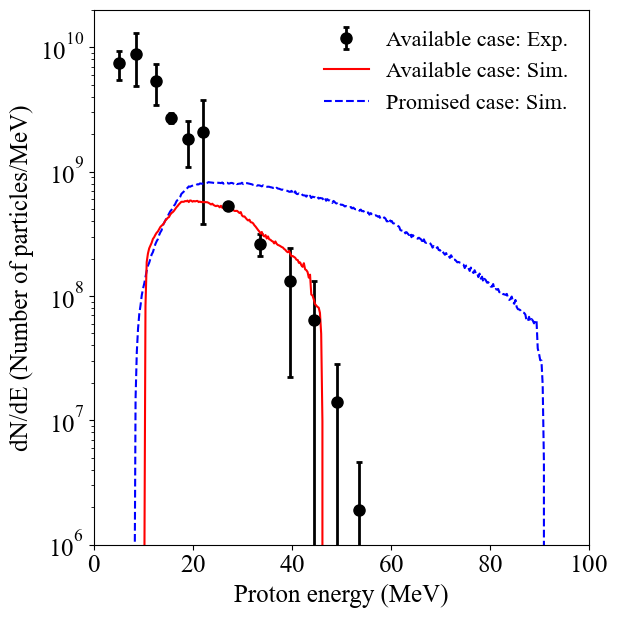

In [73]:
# plot panel (a) with proton energy spectra

width  = 3.14 *2.0
height = width
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
ax.set_yscale('log')

ax.errorbar(data_energy,
             data_dnde,
             yerr=data_error, 
             label='Available case: Exp.',
             fmt='ok',markersize=8,
             ecolor='k',elinewidth=2.0,
            #  mfc='none',
             capsize=2.0, capthick = 2.0,
            )

ax.plot(simu_energy1,
        simu_dnde1*2.3e12, 
        label="Promised case: Sim.",
        color='blue',
        linestyle='--')

ax.plot(simu_energy0,
        simu_dnde0*2.3e12, 
        label="Available case: Sim.",
        color='red')

handles, labels = ax.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend(handles, labels, 
          fancybox=False, reverse=False, frameon=False
         )

ax.set_xlim([0,100])
ax.set_ylim([1e6, 2e10])
ax.set_xlabel('Proton energy (MeV)')
ax.set_ylabel('dN/dE (Number of particles/MeV)')

fig.set_size_inches(width, height)
fig.tight_layout()

fig.savefig('/Users/yao/Desktop/spectra_proton.pdf',dpi=600)


In [63]:
# get simulation data for electron

simu_energy_e0 = np.array(S0.Screen(3, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
simu_dnde_e0   = np.array(S0.Screen(3, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments

simu_energy_e1 = np.array(S1.Screen(3, units=['mm','fs','MeV','cm^-3']).getAxis('ekin')) # MeV
simu_dnde_e1   = np.array(S1.Screen(3, units=['mm','fs','MeV','cm^-3']).getData()[-1])   # simulation unit, will be adjusted to experiments

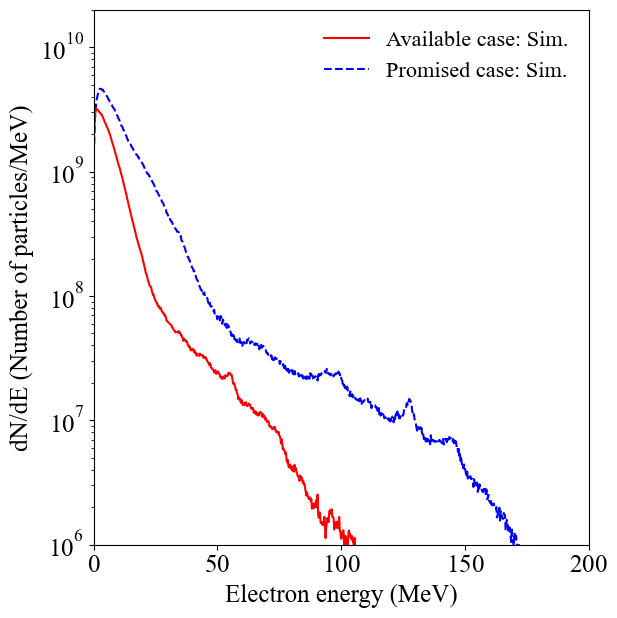

In [74]:
# plot panel (b) with proton energy spectra

width  = 3.14 *2.0
height = width
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
ax.set_yscale('log')

ax.plot(simu_energy_e1,
        simu_dnde_e1*2.3e12, 
        label="Promised case: Sim.",
        color='blue',
        linestyle='--')

ax.plot(simu_energy_e0,
        simu_dnde_e0*2.3e12, 
        label="Available case: Sim.",
        color='red')

handles, labels = ax.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend(handles, labels, 
          fancybox=False, reverse=False, frameon=False
         )

ax.set_xlim([0,200])
ax.set_ylim([1e6, 2e10])
ax.set_xlabel('Electron energy (MeV)')
ax.set_ylabel('dN/dE (Number of particles/MeV)')

fig.set_size_inches(width, height)
fig.tight_layout()

fig.savefig('/Users/yao/Desktop/spectra_electron.pdf',dpi=600)


In [70]:
# get (and calculate) simulation data for photon from inverse compton scattering (ICS)

def get_calc_photon_spectrum(case):
    P_rad      = np.array(case.RadiationSpectrum(1).getData())
    dgamma     = np.array(case.RadiationSpectrum(1).getAxis('gamma'))
    ene_photon = dgamma*0.511 # [MeV]

    Lx         = case.namelist.Lsim[0]
    Ly         = case.namelist.Lsim[1]
    Prad_unit  = 5.11e5 * 1.6e-19 * 3e10 * 1.1e21 / 0.8 / 6.28 * 1e-4 * 1e-4 # J/s/um [the last 1e-4 is cm->um]

    P_rad_time = np.array(case.RadiationSpectrum(1,units=['s']).getTimes())
    P_rad_dt   = P_rad_time[1] - P_rad_time[0] # s

    U_rad      = np.sum(P_rad,axis=0)*Lx*Ly*Prad_unit/0.511*P_rad_dt

    return ene_photon, U_rad

ene_photon0, U_rad0 = get_calc_photon_spectrum(S0)
ene_photon1, U_rad1 = get_calc_photon_spectrum(S1)

In [76]:
# get theoretical estimate data for photon from Bremstrahlung (Bre)

# the available case
brems0 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/LIOR_2025/ICS_vs_Brems/Bremmstalung_Energy_spectra2.txt',skiprows=1)

# the promised case
brems1 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/LIOR_2025/ICS_vs_Brems/Bremmstalung_Energy_spectra.txt',skiprows=1)


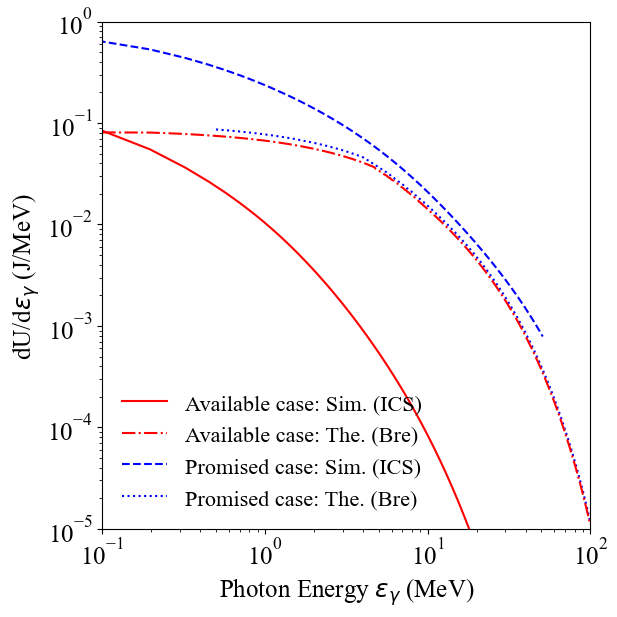

In [80]:
# plot panel (c) with photon energy spectra

width  = 3.14 *2.0
height = width
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
ax.set_yscale('log')
ax.set_xscale('log')

ax.plot(brems1[:,1],
        brems1[:,0]*3, 
        label="Promised case: The. (Bre)",
        linestyle=':',
        color='blue')

ax.plot(ene_photon1,
        U_rad1*3, 
        label="Promised case: Sim. (ICS)",
        color='blue',
        linestyle='--')

ax.plot(brems0[:,0],
        brems0[:,1]*3, 
        label="Available case: The. (Bre)",
        linestyle='-.',
        color='red')

ax.plot(ene_photon0,
        U_rad0*3, 
        label="Available case: Sim. (ICS)",
        color='red')

handles, labels = ax.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend(handles, labels, 
          fancybox=False, reverse=False, frameon=False
         )

ax.set_xlim([0.1,100])
ax.set_ylim([1e-5,1])
ax.set_xlabel(r'Photon Energy $\varepsilon_{\gamma}$ (MeV)')
ax.set_ylabel(r'dU/d$\varepsilon_{\gamma}$ (J/MeV)')

fig.set_size_inches(width, height)
fig.tight_layout()

fig.savefig('/Users/yao/Desktop/spectra_photon.pdf',dpi=600)
